Descripción del proyecto:
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'gym_churn_us.csv'
df = pd.read_csv(file_path)

print("Dimensiones del dataset:", df.shape)
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print("\n" + "="*50 + "\n")

#Exploración inicial del dataset
# Visualizar las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\n" + "="*50 + "\n")

#Análisis de valores faltantes
# Verificar valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})

print("Valores faltantes por columna:")
print(missing_data[missing_data['Valores Faltantes'] > 0])

if missing_data['Valores Faltantes'].sum() == 0:
    print("\n✅ El dataset no contiene valores faltantes.")
else:
    print(f"\n⚠️  El dataset contiene {missing_data['Valores Faltantes'].sum()} valores faltantes en total.")
    
print("\n" + "="*50 + "\n")

#Estadísticas descriptivas
# Estadísticas descriptivas para todas las variables
print("Estadísticas descriptivas del dataset completo:")
display(df.describe(include='all').T)

print("\n" + "="*50 + "\n")

Dimensiones del dataset: (4000, 14)
Número de filas: 4000
Número de columnas: 14


Primeras 5 filas del dataset:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total     

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [30]:
#Comparar valores medios entre grupos de cancelación
import pandas as pd

# Cargar datos
df = pd.read_csv('gym_churn_us.csv')

# Agrupar por 'Churn' y calcular medias
medias_por_grupo = df.groupby('Churn').mean()

# Mostrar resultados
print("Valores medios por grupo de cancelación:")
print("-" * 50)
print("Churn = 0: Clientes retenidos")
print("Churn = 1: Clientes que cancelaron")
print("-" * 50)

# Mostrar la tabla transpuesta para mejor visualización
print("\nMedias por variable:")
print(medias_por_grupo.T.round(3))

# Calcular y mostrar diferencias
print("\n" + "=" * 50)
print("DIFERENCIAS (Cancelados - Retenidos):")
print("=" * 50)

diferencias = medias_por_grupo.loc[1] - medias_por_grupo.loc[0]
for variable, diff in diferencias.items():
    print(f"{variable}: {diff:+.3f}")

Valores medios por grupo de cancelación:
--------------------------------------------------
Churn = 0: Clientes retenidos
Churn = 1: Clientes que cancelaron
--------------------------------------------------

Medias por variable:
Churn                                    0        1
gender                               0.510    0.511
Near_Location                        0.873    0.768
Partner                              0.534    0.355
Promo_friends                        0.354    0.184
Phone                                0.904    0.903
Contract_period                      5.747    1.729
Group_visits                         0.464    0.269
Age                                 29.977   26.990
Avg_additional_charges_total       158.446  115.083
Month_to_end_contract                5.283    1.663
Lifetime                             4.712    0.991
Avg_class_frequency_total            2.025    1.475
Avg_class_frequency_current_month    2.028    1.045

DIFERENCIAS (Cancelados - Retenidos):
gen

Clientes retenidos: 2939
Clientes cancelados: 1061


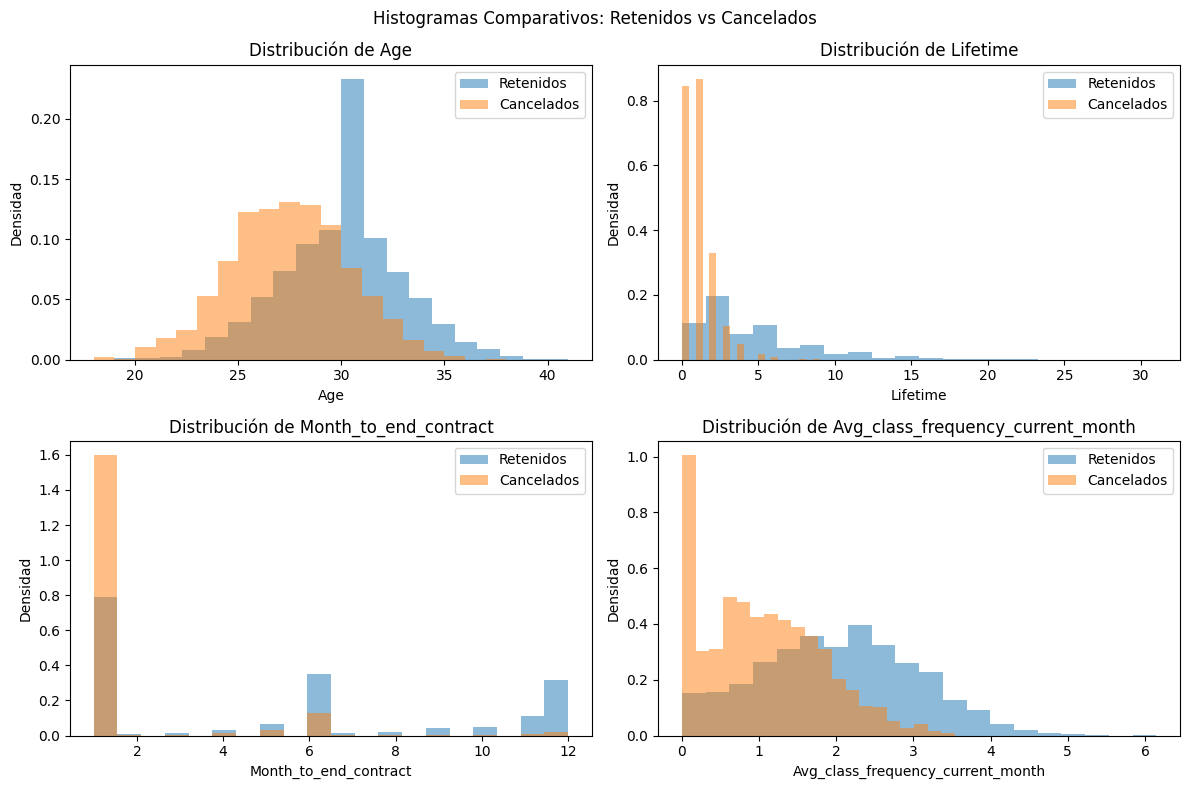

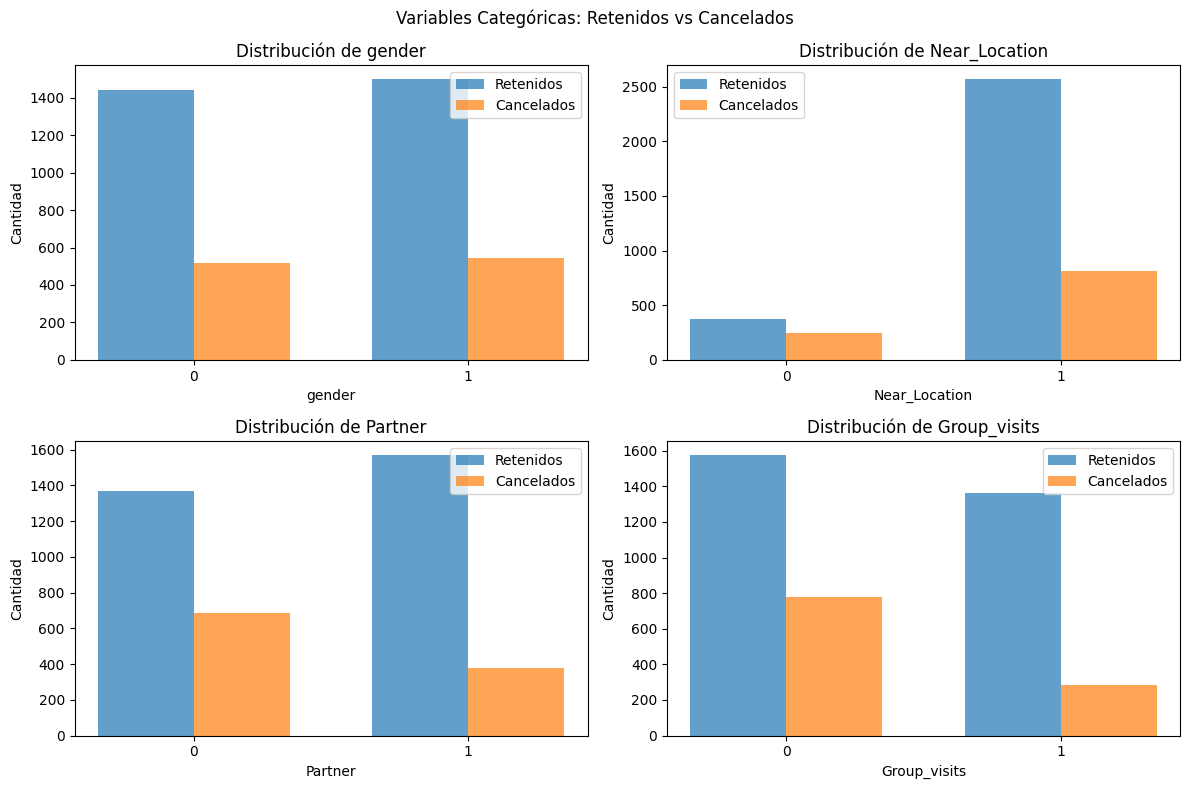

In [31]:
#Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
# Separar grupos
retenidos = df[df['Churn'] == 0]
cancelados = df[df['Churn'] == 1]

print(f"Clientes retenidos: {len(retenidos)}")
print(f"Clientes cancelados: {len(cancelados)}")

# 1. Histogramas para variables numéricas principales
variables = ['Age', 'Lifetime', 'Month_to_end_contract', 'Avg_class_frequency_current_month']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(retenidos[var], alpha=0.5, label='Retenidos', bins=20, density=True)
    ax.hist(cancelados[var], alpha=0.5, label='Cancelados', bins=20, density=True)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')
    ax.legend()

plt.suptitle('Histogramas Comparativos: Retenidos vs Cancelados')
plt.tight_layout()
plt.show()

# 2. Gráficos de barras para variables categóricas
variables_cat = ['gender', 'Near_Location', 'Partner', 'Group_visits']

fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8))
axes2 = axes2.flatten()

for i, var in enumerate(variables_cat):
    ax = axes2[i]
    
    # Contar valores por grupo
    ret_counts = retenidos[var].value_counts().sort_index()
    can_counts = cancelados[var].value_counts().sort_index()
    
    x = range(len(ret_counts))
    width = 0.35
    
    ax.bar([p - width/2 for p in x], ret_counts.values, width, label='Retenidos', alpha=0.7)
    ax.bar([p + width/2 for p in x], can_counts.values, width, label='Cancelados', alpha=0.7)
    
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Cantidad')
    ax.set_xticks(x)
    ax.set_xticklabels(ret_counts.index)
    ax.legend()

plt.suptitle('Variables Categóricas: Retenidos vs Cancelados')
plt.tight_layout()
plt.show()

Matriz de correlación:
                                   gender  Near_Location  Partner  \
gender                               1.00           0.01    -0.01   
Near_Location                        0.01           1.00    -0.01   
Partner                             -0.01          -0.01     1.00   
Promo_friends                       -0.01           0.21     0.45   
Phone                               -0.01          -0.02     0.01   
Contract_period                      0.00           0.15     0.31   
Group_visits                         0.02           0.15     0.02   
Age                                  0.01           0.06     0.05   
Avg_additional_charges_total        -0.01           0.04     0.02   
Month_to_end_contract               -0.00           0.14     0.29   
Lifetime                             0.01           0.07     0.06   
Avg_class_frequency_total            0.01           0.04     0.02   
Avg_class_frequency_current_month    0.01           0.06     0.05   
Churn      

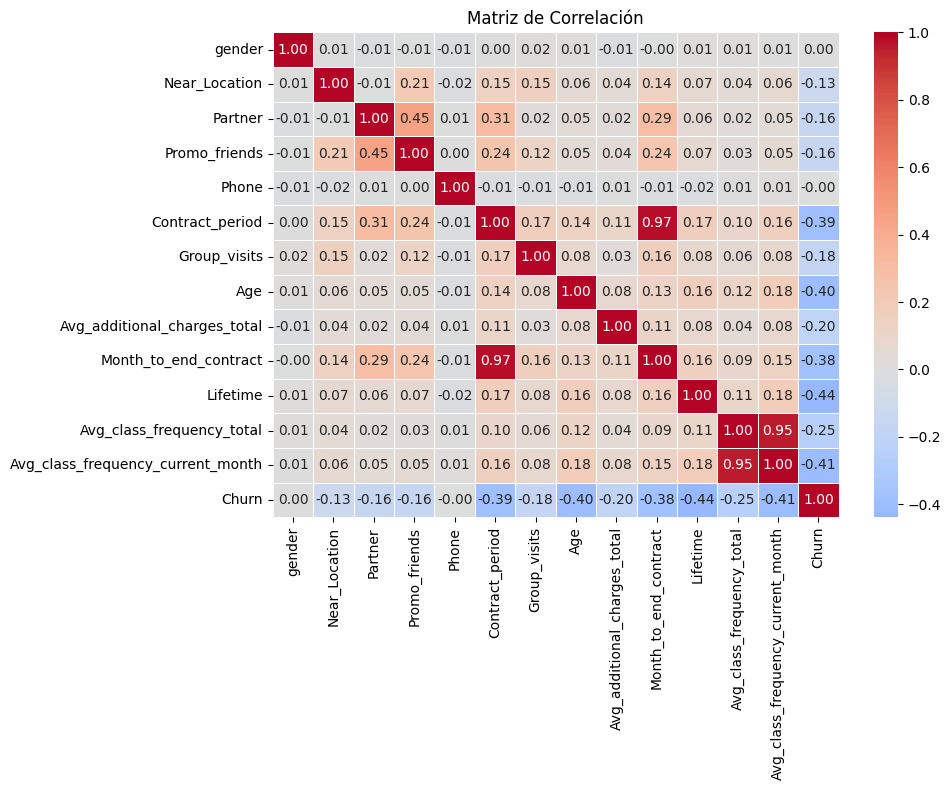


Correlaciones con CHURN (ordenadas por magnitud):
gender                              +0.001
Phone                               -0.001
Near_Location                       -0.128
Partner                             -0.158
Promo_friends                       -0.162
Group_visits                        -0.175
Avg_additional_charges_total        -0.199
Avg_class_frequency_total           -0.250
Month_to_end_contract               -0.381
Contract_period                     -0.390
Age                                 -0.405
Avg_class_frequency_current_month   -0.412
Lifetime                            -0.438


In [32]:
#Crea una matriz de correlación y muéstrala.
# 1. Calcular matriz de correlación
print("Matriz de correlación:")
print("=" * 50)

# Seleccionar solo variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular correlaciones
correlacion = df[variables_numericas].corr()

# Mostrar tabla de correlaciones
print(correlacion.round(2))

# 2. Visualizar matriz de correlación
print("\n" + "=" * 50)
print("Mapa de calor de correlaciones")

plt.figure(figsize=(10, 8))

# Crear heatmap
sns.heatmap(correlacion, 
            annot=True,      # Mostrar valores
            cmap='coolwarm', # Colores
            center=0,        # Centro en 0
            fmt='.2f',       # Formato decimal
            linewidths=0.5)  # Líneas entre celdas

plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# 3. Correlaciones con la variable objetivo 'Churn'
print("\n" + "=" * 50)
print("Correlaciones con CHURN (ordenadas por magnitud):")
print("=" * 50)

correlaciones_churn = correlacion['Churn'].sort_values(ascending=False)

for variable, valor in correlaciones_churn.items():
    if variable != 'Churn':
        print(f"{variable:35} {valor:+.3f}")

In [33]:
#Construir un modelo para predecir la cancelación de usuarios
#Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.
#Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Cargar datos
df = pd.read_csv('gym_churn_us.csv')

print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Tasa de cancelación: {df['Churn'].mean():.2%}")

# 2. Separar características (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)  # Todas las columnas excepto 'Churn'
y = df['Churn']               # Variable objetivo

print(f"\nCaracterísticas (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")

# 3. Codificar variables categóricas (si las hay)
# Identificar columnas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_cols:
    print(f"\nVariables categóricas encontradas: {categorical_cols}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"Después de one-hot encoding: {X.shape}")
else:
    print("\nNo hay variables categóricas para codificar")

# 4. Dividir en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% para test/validación
    random_state=42,      # Semilla para reproducibilidad
    stratify=y           # Mantener proporción de clases
)

print(f"\nDivisión completada:")
print(f"  Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Validación:    {X_test.shape[0]} muestras ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verificar distribución de clases en cada conjunto
print(f"\nDistribución de clases en entrenamiento:")
print(f"  Clase 0 (Retenidos): {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Clase 1 (Cancelados): {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")

print(f"\nDistribución de clases en validación:")
print(f"  Clase 0 (Retenidos): {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Clase 1 (Cancelados): {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")

Datos cargados: 4000 filas, 14 columnas
Tasa de cancelación: 26.52%

Características (X): (4000, 13)
Variable objetivo (y): (4000,)

No hay variables categóricas para codificar

División completada:
  Entrenamiento: 3200 muestras (80.0%)
  Validación:    800 muestras (20.0%)

Distribución de clases en entrenamiento:
  Clase 0 (Retenidos): 2351 (73.5%)
  Clase 1 (Cancelados): 849 (26.5%)

Distribución de clases en validación:
  Clase 0 (Retenidos): 588 (73.5%)
  Clase 1 (Cancelados): 212 (26.5%)


In [34]:
#Entrena el modelo en el set de entrenamiento con dos métodos:regresión logística; bosque aleatorio.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convertir variables categóricas si existen
df = pd.get_dummies(df, drop_first=True)

# Separar características y objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")
print("-" * 50)

# 1. ENTRENAR REGRESIÓN LOGÍSTICA
print("\n📈 ENTRENANDO REGRESIÓN LOGÍSTICA...")
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Predecir y evaluar
y_pred_logistico = modelo_logistico.predict(X_test)
accuracy_logistico = accuracy_score(y_test, y_pred_logistico)

print(f"Precisión Regresión Logística: {accuracy_logistico:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_logistico))
print("-" * 50)

# 2. ENTRENAR BOSQUE ALEATORIO
print("\n🌲 ENTRENANDO BOSQUE ALEATORIO...")
modelo_bosque = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_bosque.fit(X_train, y_train)

# Predecir y evaluar
y_pred_bosque = modelo_bosque.predict(X_test)
accuracy_bosque = accuracy_score(y_test, y_pred_bosque)

print(f"Precisión Bosque Aleatorio: {accuracy_bosque:.2%}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_bosque))

# 3. COMPARAR MODELOS
print("\n" + "="*50)
print("📊 COMPARACIÓN DE MODELOS")
print("="*50)
print(f"Regresión Logística: {accuracy_logistico:.2%}")
print(f"Bosque Aleatorio:    {accuracy_bosque:.2%}")
print(f"Diferencia:          {accuracy_bosque - accuracy_logistico:+.2%}")

Entrenamiento: (3200, 13)
Prueba: (800, 13)
--------------------------------------------------

📈 ENTRENANDO REGRESIÓN LOGÍSTICA...
Precisión Regresión Logística: 92.38%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

--------------------------------------------------

🌲 ENTRENANDO BOSQUE ALEATORIO...
Precisión Bosque Aleatorio: 92.75%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.89      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800


📊

In [35]:
#Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Cargar y preparar datos
print("📊 PREPARANDO DATOS...")
df = pd.read_csv('gym_churn_us.csv')
df = pd.get_dummies(df, drop_first=True)

X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir datos con random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento: {X_train.shape}")
print(f"Validación: {X_test.shape}")
print("-" * 50)

# 2. Entrenar modelos
print("\n🎯 ENTRENANDO MODELOS...")

# Regresión Logística con random_state
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Bosque Aleatorio con random_state
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# 3. Predecir
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# 4. Calcular métricas
print("\n📊 EVALUACIÓN DE MODELOS")
print("=" * 60)

# Función para calcular y mostrar métricas
def evaluar_modelo(nombre, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{nombre}:")
    print(f"  Exactitud (Accuracy):  {accuracy:.3f} ({accuracy*100:.1f}%)")
    print(f"  Precisión (Precision): {precision:.3f}")
    print(f"  Recall:                {recall:.3f}")
    print(f"  F1-Score:              {f1:.3f}")
    
    return accuracy, precision, recall, f1

# Evaluar ambos modelos
print("\n" + "-"*60)
lr_acc, lr_prec, lr_rec, lr_f1 = evaluar_modelo("REGRESIÓN LOGÍSTICA", y_test, y_pred_lr)
print("\n" + "-"*60)
rf_acc, rf_prec, rf_rec, rf_f1 = evaluar_modelo("BOSQUE ALEATORIO", y_test, y_pred_rf)

# 5. Comparar modelos
print("\n" + "="*60)
print("🏆 COMPARACIÓN FINAL")
print("="*60)

print(f"\n{'Métrica':<15} {'Reg. Logística':<15} {'Bosque Aleatorio':<15} {'Mejor':<10}")
print("-" * 55)
print(f"{'Exactitud':<15} {lr_acc:<15.3f} {rf_acc:<15.3f} {'✅ RF' if rf_acc > lr_acc else '✅ LR'}")
print(f"{'Precisión':<15} {lr_prec:<15.3f} {rf_prec:<15.3f} {'✅ RF' if rf_prec > lr_prec else '✅ LR'}")
print(f"{'Recall':<15} {lr_rec:<15.3f} {rf_rec:<15.3f} {'✅ RF' if rf_rec > lr_rec else '✅ LR'}")
print(f"{'F1-Score':<15} {lr_f1:<15.3f} {rf_f1:<15.3f} {'✅ RF' if rf_f1 > lr_f1 else '✅ LR'}")

# 6. Conclusión
print("\n" + "="*60)
print("📈 CONCLUSIÓN")
print("="*60)

if rf_acc > lr_acc and rf_f1 > lr_f1:
    print("\n✅ EL BOSQUE ALEATORIO ES EL MEJOR MODELO")
    print("   - Tiene mayor exactitud y F1-Score")
elif lr_acc > rf_acc and lr_f1 > rf_f1:
    print("\n✅ LA REGRESIÓN LOGÍSTICA ES EL MEJOR MODELO")
    print("   - Tiene mayor exactitud y F1-Score")
else:
    print("\n⚠️  LOS MODELOS TIENEN VENTAJAS DIFERENTES")
    if rf_acc > lr_acc:
        print("   - Bosque Aleatorio tiene mejor exactitud")
    else:
        print("   - Regresión Logística tiene mejor exactitud")
    
    if rf_rec > lr_rec:
        print("   - Bosque Aleatorio detecta mejor los clientes que cancelan")
    else:
        print("   - Regresión Logística detecta mejor los clientes que cancelan")

📊 PREPARANDO DATOS...
Entrenamiento: (3200, 13)
Validación: (800, 13)
--------------------------------------------------

🎯 ENTRENANDO MODELOS...

📊 EVALUACIÓN DE MODELOS

------------------------------------------------------------

REGRESIÓN LOGÍSTICA:
  Exactitud (Accuracy):  0.924 (92.4%)
  Precisión (Precision): 0.876
  Recall:                0.830
  F1-Score:              0.852

------------------------------------------------------------

BOSQUE ALEATORIO:
  Exactitud (Accuracy):  0.927 (92.8%)
  Precisión (Precision): 0.885
  Recall:                0.835
  F1-Score:              0.859

🏆 COMPARACIÓN FINAL

Métrica         Reg. Logística  Bosque Aleatorio Mejor     
-------------------------------------------------------
Exactitud       0.924           0.927           ✅ RF
Precisión       0.876           0.885           ✅ RF
Recall          0.830           0.835           ✅ RF
F1-Score        0.852           0.859           ✅ RF

📈 CONCLUSIÓN

✅ EL BOSQUE ALEATORIO ES EL MEJOR M

In [36]:
#Crear clústeres de usuarios/as
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Cargar datos
df = pd.read_csv('gym_churn_us.csv')
print(f"Datos originales: {df.shape}")

# 2. Eliminar columna 'Churn' (cancelación)
df_sin_churn = df.drop('Churn', axis=1)
print(f"\nSin columna Churn: {df_sin_churn.shape}")

# 3. Convertir variables categóricas a numéricas
df_encoded = pd.get_dummies(df_sin_churn, drop_first=True)
print(f"\nDespués de codificación: {df_encoded.shape}")

# 4. Estandarizar los datos
scaler = StandardScaler()
df_estandarizado = scaler.fit_transform(df_encoded)

# Convertir de nuevo a DataFrame para mejor visualización
df_estandarizado_df = pd.DataFrame(df_estandarizado, columns=df_encoded.columns)

print("\n✅ DATOS ESTANDARIZADOS:")
print("-" * 50)
print(f"Forma: {df_estandarizado_df.shape}")
print(f"\nPrimeras 5 filas estandarizadas:")
print(df_estandarizado_df.head().round(3))

# 5. Verificar estadísticas después de estandarización
print("\n📊 ESTADÍSTICAS DESPUÉS DE ESTANDARIZACIÓN:")
print("-" * 50)
print("Media de cada columna (debería ser ~0):")
print(df_estandarizado_df.mean().round(3))
print("\nDesviación estándar de cada columna (debería ser ~1):")
print(df_estandarizado_df.std().round(3))

Datos originales: (4000, 14)

Sin columna Churn: (4000, 13)

Después de codificación: (4000, 13)

✅ DATOS ESTANDARIZADOS:
--------------------------------------------------
Forma: (4000, 13)

Primeras 5 filas estandarizadas:
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0   0.980          0.428    1.027          1.497 -3.060            0.290   
1  -1.021          0.428   -0.974         -0.668  0.327            1.609   
2  -1.021          0.428    1.027         -0.668  0.327           -0.809   
3  -1.021          0.428    1.027          1.497  0.327            1.609   
4   0.980          0.428    1.027          1.497  0.327           -0.809   

   Group_visits    Age  Avg_additional_charges_total  Month_to_end_contract  \
0         1.194 -0.057                        -1.378                  0.162   
1         1.194  0.557                        -0.350                  1.832   
2        -0.837 -0.363                        -0.182                 -0.793   
3 

📊 Cargando datos...
⚙️ Estandarizando datos...
Datos estandarizados: (4000, 13)
🔗 Calculando linkage...
📈 Creando dendrograma...

🔍 ANALIZANDO DENDROGRAMA...
--------------------------------------------------
Cantidad sugerida de clusters: 3-5


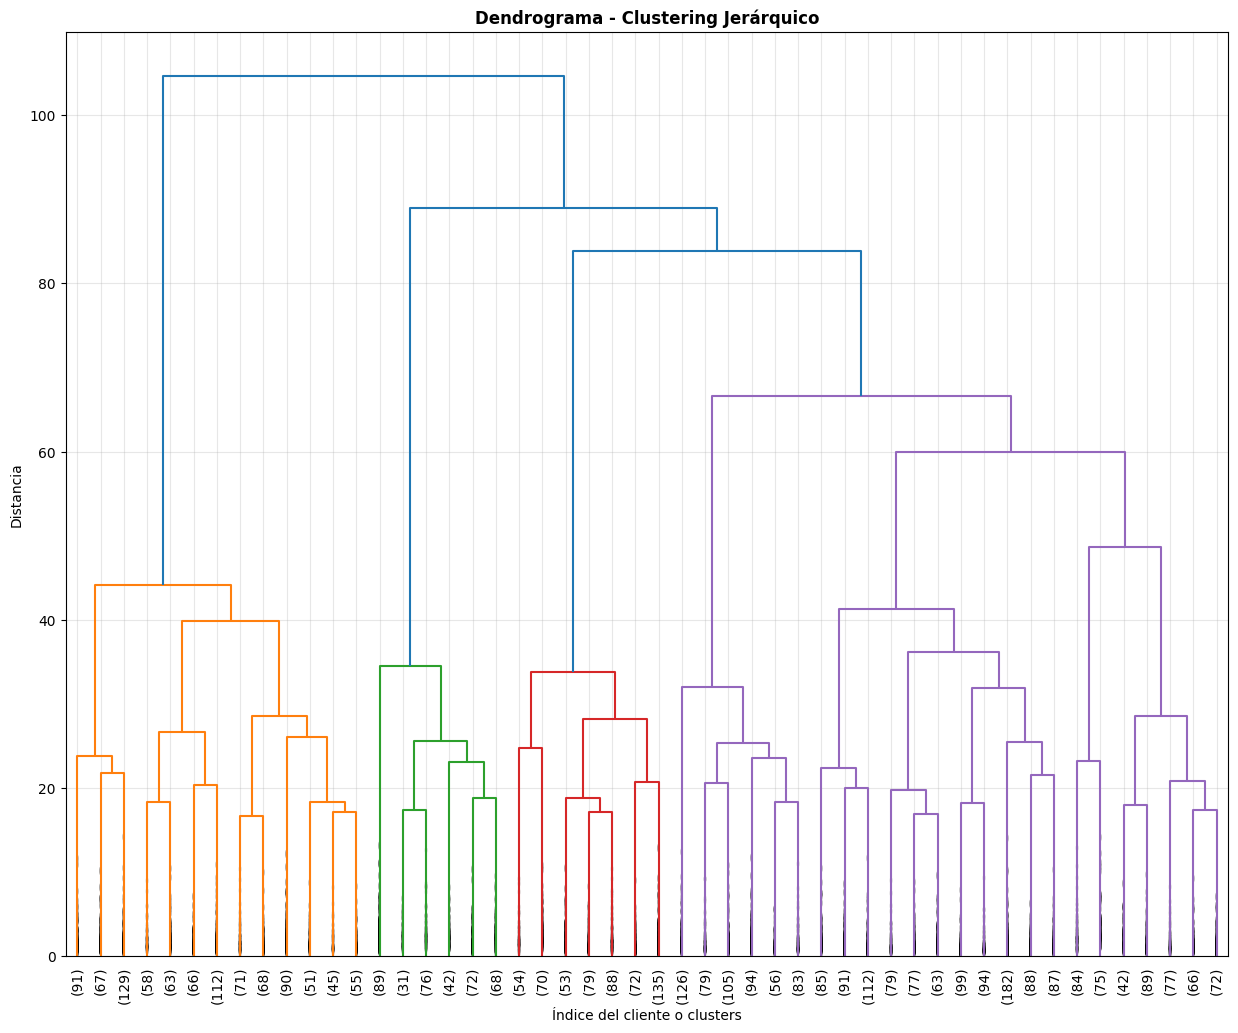


✅ Dendrograma completado!

💡 RECOMENDACIÓN:
--------------------------------------------------
Basado en el dendrograma, sugiero usar entre 3 y 5 clusters.
Observa las líneas verticales largas para identificar buenos puntos de corte.


In [37]:
#Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# 1. Cargar y preparar datos
print("📊 Cargando datos...")
df = pd.read_csv('gym_churn_us.csv')
df_sin_churn = df.drop('Churn', axis=1)
df_encoded = pd.get_dummies(df_sin_churn, drop_first=True)

# 2. Estandarizar
print("⚙️ Estandarizando datos...")
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(df_encoded)

# Usar una muestra más pequeña para que sea más rápido (opcional)
# datos_muestra = datos_estandarizados[:500]  # Usar solo 500 muestras para prueba rápida

print(f"Datos estandarizados: {datos_estandarizados.shape}")

# 3. Crear matriz de distancias con linkage
print("🔗 Calculando linkage...")
# 'ward' es un método común para clustering jerárquico
linkage_matrix = linkage(datos_estandarizados, method='ward', metric='euclidean')

# 4. Graficar dendrograma
print("📈 Creando dendrograma...")
plt.figure(figsize=(15, 12))

# Graficar dendrograma
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Mostrar solo los últimos p clusters fusionados
    p=50,                   # Mostrar los últimos 50 clusters
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

plt.title('Dendrograma - Clustering Jerárquico', fontweight='bold')
plt.xlabel('Índice del cliente o clusters')
plt.ylabel('Distancia')
plt.grid(True, alpha=0.3)

# 5. Sugerir número de clusters basado en el dendrograma
print("\n🔍 ANALIZANDO DENDROGRAMA...")
print("-" * 50)

print("Cantidad sugerida de clusters: 3-5")

plt.show()

print("\n✅ Dendrograma completado!")
print("\n💡 RECOMENDACIÓN:")
print("-" * 50)
print("Basado en el dendrograma, sugiero usar entre 3 y 5 clusters.")
print("Observa las líneas verticales largas para identificar buenos puntos de corte.")

📊 CARGANDO Y PREPARANDO DATOS...
Datos para clustering: (4000, 13)
⚙️ ESTANDARIZANDO DATOS...
🎯 ENTRENANDO K-MEANS CON 5 CLUSTERS...

✅ CLUSTERS ASIGNADOS:
Número de clusters: 5

Distribución de clientes por cluster:
Cluster
0     544
1     936
2     646
3    1107
4     767
Name: count, dtype: int64

📊 CARACTERÍSTICAS POR CLUSTER:
           Age  Lifetime  Month_to_end_contract  \
Cluster                                           
0        28.48      2.78                   2.07   
1        29.93      4.67                  10.88   
2        29.22      3.74                   2.93   
3        28.21      2.39                   1.90   
4        30.14      5.15                   2.59   

         Avg_class_frequency_current_month  Avg_additional_charges_total  
Cluster                                                                   
0                                     1.47                        133.63  
1                                     1.99                        164.63  
2        

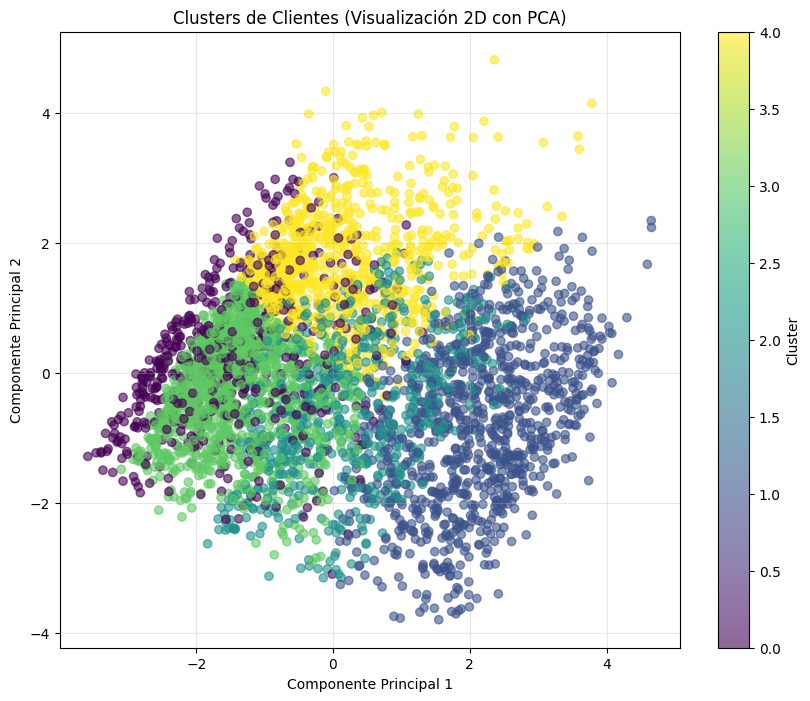


🔍 RELACIÓN ENTRE CLUSTERS Y CANCELACIÓN:
----------------------------------------
Cluster 0: 45.0% de cancelación
Cluster 1: 2.2% de cancelación
Cluster 2: 24.6% de cancelación
Cluster 3: 52.7% de cancelación
Cluster 4: 6.9% de cancelación


In [38]:
#Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Cargar y preparar datos
print("📊 CARGANDO Y PREPARANDO DATOS...")
df = pd.read_csv('gym_churn_us.csv')

# Eliminar columna Churn y codificar variables categóricas
df_sin_churn = df.drop('Churn', axis=1)
df_encoded = pd.get_dummies(df_sin_churn, drop_first=True)

print(f"Datos para clustering: {df_encoded.shape}")

# 2. Estandarizar datos
print("⚙️ ESTANDARIZANDO DATOS...")
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(df_encoded)

# 3. Entrenar modelo K-means con n=5 clusters
print("🎯 ENTRENANDO K-MEANS CON 5 CLUSTERS...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(datos_estandarizados)

# 4. Agregar etiquetas de clusters al DataFrame original
df['Cluster'] = clusters
print(f"\n✅ CLUSTERS ASIGNADOS:")
print(f"Número de clusters: {len(set(clusters))}")
print("\nDistribución de clientes por cluster:")
print(df['Cluster'].value_counts().sort_index())

# 5. Ver características de cada cluster
print("\n📊 CARACTERÍSTICAS POR CLUSTER:")
# Calcular medias de variables importantes por cluster
variables_importantes = ['Age', 'Lifetime', 'Month_to_end_contract', 
                         'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

caracteristicas_clusters = df.groupby('Cluster')[variables_importantes].mean()
print(caracteristicas_clusters.round(2))

# 6. Visualizar clusters (2D con PCA para simplificar)
print("\n📈 VISUALIZANDO CLUSTERS...")
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
datos_2d = pca.fit_transform(datos_estandarizados)

# Crear gráfico de dispersión
plt.figure(figsize=(10, 8))
scatter = plt.scatter(datos_2d[:, 0], datos_2d[:, 1], 
                     c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters de Clientes (Visualización 2D con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, alpha=0.3)
plt.show()

# 7. Analizar relación entre clusters y cancelación
print("\n🔍 RELACIÓN ENTRE CLUSTERS Y CANCELACIÓN:")
print("-" * 40)
tasa_churn_por_cluster = df.groupby('Cluster')['Churn'].mean() * 100
for cluster, tasa in tasa_churn_por_cluster.items():
    print(f"Cluster {cluster}: {tasa:.1f}% de cancelación")

In [39]:
#Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
import pandas as pd
from sklearn.cluster import KMeans

# Cargar datos
df = pd.read_csv('gym_churn_us.csv')

# Preparar datos para clustering (sin Churn)
X = pd.get_dummies(df.drop('Churn', axis=1))

# Aplicar K-means con 5 clusters
df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(X)

# Analizar medias por cluster
print("📊 VALORES MEDIOS POR CLUSTER:")
print("="*50)

# Variables clave a analizar
variables = ['Age', 'Month_to_end_contract', 'Avg_class_frequency_current_month', 
             'Avg_additional_charges_total', 'Churn', 'Lifetime']

medias_por_cluster = df.groupby('Cluster')[variables].mean().round(2)

print("\nMedias de características importantes:")
print(medias_por_cluster)

print("\n" + "="*50)
print("🔍 HALLAZGOS DESTACADOS:")
print("="*50)

# Analizar cada cluster
for cluster in range(5):
    datos_cluster = df[df['Cluster'] == cluster]
    print(f"\n🔸 CLUSTER {cluster} ({len(datos_cluster)} clientes):")
    
    # Meses hasta fin de contrato
    meses_contrato = datos_cluster['Month_to_end_contract'].mean()
    if meses_contrato < 2:
        print(f"  ⚠️  Contrato cerca de vencer: {meses_contrato:.1f} meses")
    
    # Frecuencia de visitas
    visitas = datos_cluster['Avg_class_frequency_current_month'].mean()
    if visitas > 3:
        print(f"  🏃 Visitas frecuentes: {visitas:.1f}/semana")
    elif visitas < 1:
        print(f"  🏠 Visitas poco frecuentes: {visitas:.1f}/semana")
    
    # Tasa de cancelación
    tasa_churn = datos_cluster['Churn'].mean() * 100
    if tasa_churn > 30:
        print(f"  🔥 ALTO RIESGO: {tasa_churn:.1f}% cancelación")
    elif tasa_churn < 10:
        print(f"  ✅ BAJO RIESGO: {tasa_churn:.1f}% cancelación")

📊 VALORES MEDIOS POR CLUSTER:

Medias de características importantes:
           Age  Month_to_end_contract  Avg_class_frequency_current_month  \
Cluster                                                                    
0        29.34                   5.00                               1.84   
1        28.97                   4.00                               1.71   
2        28.91                   3.86                               1.69   
3        29.85                   5.38                               2.01   
4        29.40                   4.38                               1.79   

         Avg_additional_charges_total  Churn  Lifetime  
Cluster                                                 
0                              250.98   0.18      4.17  
1                              105.93   0.33      3.54  
2                               35.60   0.35      3.39  
3                              356.48   0.04      4.42  
4                              174.87   0.23      3.75 

Clientes por cluster:
Cluster
0     706
1    1029
2    1032
3     271
4     962
Name: count, dtype: int64


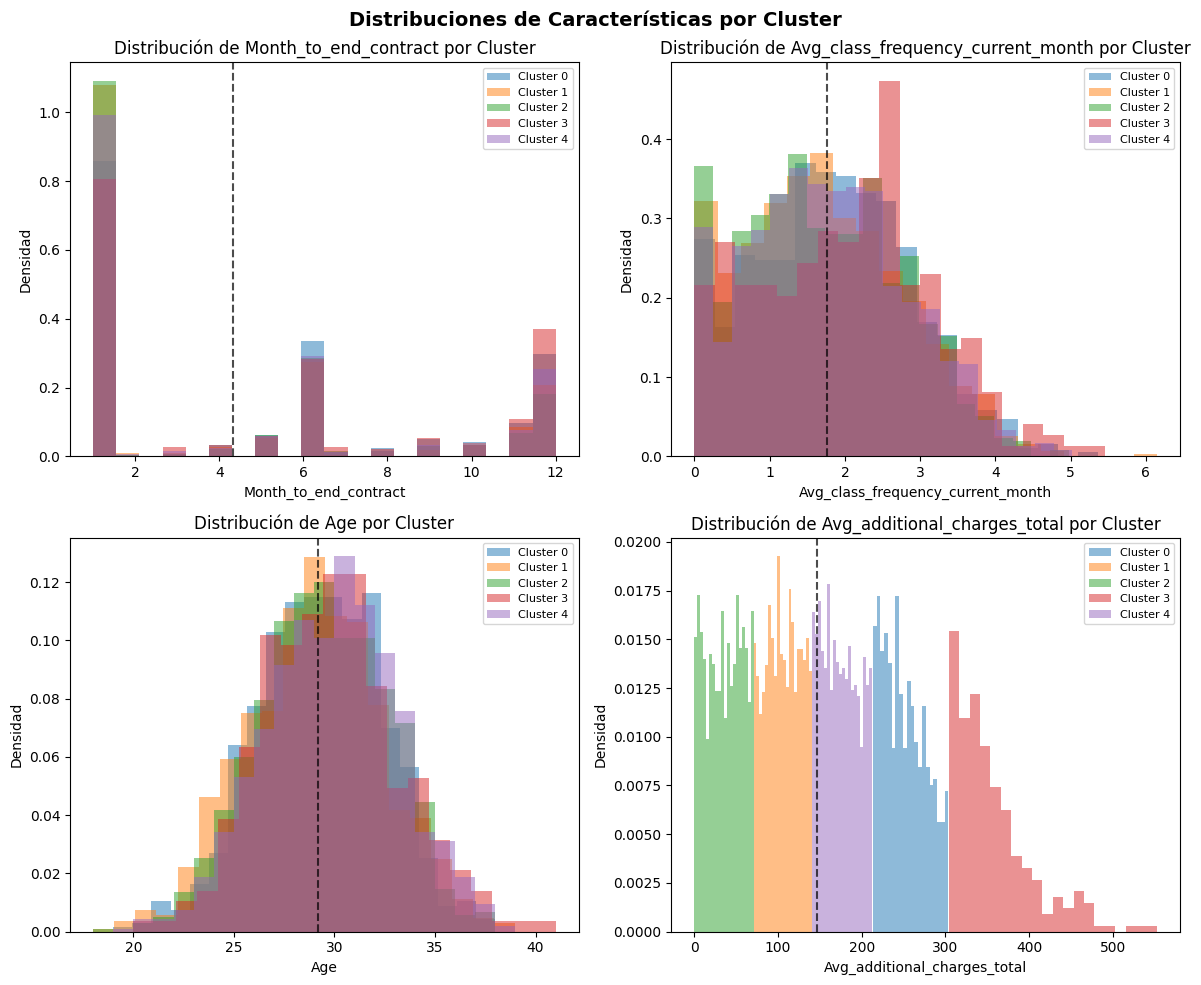


🔍 OBSERVACIONES:

📊 Month_to_end_contract:
  Cluster 0: Media=5.00, Desv=4.34
  Cluster 1: Media=4.00, Desv=4.09
  Cluster 2: Media=3.86, Desv=3.95
  Cluster 3: Media=5.38, Desv=4.52
  Cluster 4: Media=4.38, Desv=4.22

📊 Avg_class_frequency_current_month:
  Cluster 0: Media=1.84, Desv=1.04
  Cluster 1: Media=1.71, Desv=1.05
  Cluster 2: Media=1.69, Desv=1.04
  Cluster 3: Media=2.01, Desv=1.14
  Cluster 4: Media=1.79, Desv=1.03

📊 Age:
  Cluster 0: Media=29.34, Desv=3.28
  Cluster 1: Media=28.97, Desv=3.24
  Cluster 2: Media=28.91, Desv=3.21
  Cluster 3: Media=29.85, Desv=3.23
  Cluster 4: Media=29.40, Desv=3.28

📊 Avg_additional_charges_total:
  Cluster 0: Media=250.98, Desv=25.06
  Cluster 1: Media=105.93, Desv=19.77
  Cluster 2: Media=35.60, Desv=20.84
  Cluster 3: Media=356.48, Desv=46.93
  Cluster 4: Media=174.87, Desv=21.04


In [40]:
#Traza distribuciones de características para los clústeres. ¿Notas algo?
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargar datos y crear clusters
df = pd.read_csv('gym_churn_us.csv')
X = pd.get_dummies(df.drop('Churn', axis=1))
df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(X)

print(f"Clientes por cluster:")
print(df['Cluster'].value_counts().sort_index())

# Variables clave para visualizar
variables = ['Month_to_end_contract', 'Avg_class_frequency_current_month', 'Age', 'Avg_additional_charges_total']

# Crear gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Crear histograma por cluster
    for cluster in range(5):
        cluster_data = df[df['Cluster'] == cluster][var]
        ax.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster}', bins=20, density=True)
    
    ax.set_title(f'Distribución de {var} por Cluster')
    ax.set_xlabel(var)
    ax.set_ylabel('Densidad')
    ax.legend(fontsize=8)
    
    # Añadir línea vertical de la media global
    ax.axvline(df[var].mean(), color='black', linestyle='--', alpha=0.7, label='Media global')

plt.suptitle('Distribuciones de Características por Cluster', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 OBSERVACIONES:")
print("="*50)

# Analizar distribuciones específicas
for var in variables:
    print(f"\n📊 {var}:")
    for cluster in range(5):
        datos = df[df['Cluster'] == cluster][var]
        print(f"  Cluster {cluster}: Media={datos.mean():.2f}, Desv={datos.std():.2f}")

In [41]:
#Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?
import pandas as pd
from sklearn.cluster import KMeans

# 1. Cargar datos y crear clusters
df = pd.read_csv('gym_churn_us.csv')
X = pd.get_dummies(df.drop('Churn', axis=1))
df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(X)

# 2. Calcular tasa de cancelación por cluster
print("📊 TASA DE CANCELACIÓN POR CLUSTER")
print("="*50)

# Calcular número de clientes y tasa de cancelación
resultados = df.groupby('Cluster').agg(
    Total_Clientes=('Churn', 'count'),
    Cancelaciones=('Churn', 'sum'),
    Tasa_Cancelacion=('Churn', lambda x: (x.mean() * 100).round(2))
).reset_index()

print(resultados.to_string(index=False))

# 3. Clasificar clusters por lealtad
print("\n🔍 CLASIFICACIÓN POR LEALTAD")
print("="*50)

alto_riesgo = []
bajo_riesgo = []
medio_riesgo = []

for _, row in resultados.iterrows():
    cluster = row['Cluster']
    tasa = row['Tasa_Cancelacion']
    
    if tasa > 30:
        alto_riesgo.append(f"Cluster {cluster} ({tasa}%)")
    elif tasa < 15:
        bajo_riesgo.append(f"Cluster {cluster} ({tasa}%)")
    else:
        medio_riesgo.append(f"Cluster {cluster} ({tasa}%)")

print("🚨 CLUSTERS DE ALTO RIESGO (propensos a irse):")
print(", ".join(alto_riesgo) if alto_riesgo else "Ninguno")

print("\n✅ CLUSTERS DE BAJO RIESGO (clientes leales):")
print(", ".join(bajo_riesgo) if bajo_riesgo else "Ninguno")

print("\n⚠️  CLUSTERS DE RIESGO MEDIO:")
print(", ".join(medio_riesgo) if medio_riesgo else "Ninguno")

# 4. Análisis adicional
print("\n📈 COMPARACIÓN CON LA MEDIA GLOBAL")
print("="*50)
tasa_global = df['Churn'].mean() * 100
print(f"Tasa de cancelación global: {tasa_global:.2f}%")

print("\nDiferencias respecto a la media global:")
for _, row in resultados.iterrows():
    diferencia = row['Tasa_Cancelacion'] - tasa_global
    if diferencia > 0:
        print(f"Cluster {row['Cluster']}: +{diferencia:.2f}% por encima del promedio")
    else:
        print(f"Cluster {row['Cluster']}: {diferencia:.2f}% por debajo del promedio")

📊 TASA DE CANCELACIÓN POR CLUSTER
 Cluster  Total_Clientes  Cancelaciones  Tasa_Cancelacion
       0             706            126             17.85
       1            1029            344             33.43
       2            1032            361             34.98
       3             271             12              4.43
       4             962            218             22.66

🔍 CLASIFICACIÓN POR LEALTAD
🚨 CLUSTERS DE ALTO RIESGO (propensos a irse):
Cluster 1.0 (33.43%), Cluster 2.0 (34.98%)

✅ CLUSTERS DE BAJO RIESGO (clientes leales):
Cluster 3.0 (4.43%)

⚠️  CLUSTERS DE RIESGO MEDIO:
Cluster 0.0 (17.85%), Cluster 4.0 (22.66%)

📈 COMPARACIÓN CON LA MEDIA GLOBAL
Tasa de cancelación global: 26.52%

Diferencias respecto a la media global:
Cluster 0.0: -8.67% por debajo del promedio
Cluster 1.0: +6.91% por encima del promedio
Cluster 2.0: +8.45% por encima del promedio
Cluster 3.0: -22.09% por debajo del promedio
Cluster 4.0: -3.86% por debajo del promedio


Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

🎯 PRINCIPIOS ESENCIALES DE RETENCIÓN
==================================================

🔍 HALLAZGOS CLAVE:
1. La frecuencia de visitas es el principal predictor de cancelación
2. Los contratos próximos a vencer tienen riesgo extremo
3. Los clientes se agrupan naturalmente en perfiles diferenciados

==================================================
💡 TRES PRINCIPIOS ESTRATÉGICOS
==================================================

1️⃣ PRINCIPIO PROACTIVO
   • Detectar riesgos ANTES de la cancelación
   
   📋 PASOS DE MARKETING:
   • Sistema de alerta a 30 días del vencimiento
   • Contacto automatizado por email/SMS
   • Oferta de renovación anticipada con 15% descuento

2️⃣ PRINCIPIO DE FRECUENCIA  
   • Más visitas = menor cancelación
   
   📋 PASOS DE MARKETING:
   • Programa "8 visitas = 1 gratis"
   • Retos mensuales con premios
   • Recordatorios personalizados de clases

3️⃣ PRINCIPIO DE SEGMENTACIÓN
   • Tratamiento diferenciado por perfil
   
   📋 PASOS DE MARKETING:
   • Comunicaciones segmentadas por cluster
   • Ofertas personalizadas según comportamiento
   • Programas específicos para cada grupo de riesgo